In [35]:
import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import operator as op
import pandas as pd
import time
import sys


In [120]:
def rendomVoteGeneratorIV(imgSetSize, voteCount, outFileName):
    IMGSET_SIZE = imgSetSize
    VOTE_COUNT = voteCount
    imgVoteCounter = np.zeros((IMGSET_SIZE, 2)).astype(int)
    voteOut = np.zeros((voteCount, 3)).astype(int)
    voteOutIndex = 0
    
    # initlaize imgVoteCounter first index with image index
    for i in range(imgVoteCounter.shape[0]):
        imgVoteCounter[i][0] = i + 1
        
   
    
    voteCheckList = dict()
    
    while voteOutIndex < voteCount:    
        # order from low vote count to high vote count
        imgVoteCounter = imgVoteCounter[imgVoteCounter[:,1].argsort()]
        # get lowest vote count
        lowestVoteCount = imgVoteCounter[0][1]
        # fittel by lowestVoteCount
        searchArray = imgVoteCounter[imgVoteCounter[:,1]<=lowestVoteCount] 
        # print(searchArray.shape)
        if searchArray.shape[0] <= 6:
            lowestVoteCount = lowestVoteCount + 1
            searchArray = imgVoteCounter[imgVoteCounter[:,1]<=lowestVoteCount]
            # print("Low Threshold achieved searchArray.shape %i lowestVoteCount % i !!!" % (searchArray.shape[0],lowestVoteCount))
            
            
        igmAIndex = np.random.randint(0,searchArray.shape[0],1)
        igmBIndex = np.random.randint(0,searchArray.shape[0],1)
        imgA = int(searchArray[igmAIndex[0]][0])
        imgB = int(searchArray[igmBIndex[0]][0])
        # print(imgA)
        # print(imgB)
        # Repeated Values are not allowe
        if imgA != imgB:
            str1Entry = str(imgA) + "_" + str(imgB)
            str2Entry = str(imgB) + "-_" + str(imgA)
            noRepeat = True
            # repeated comparisons are not allowed
            if str1Entry in voteCheckList or str2Entry in voteCheckList:
                noRepeat = True
                # print("REPEATED COMPARISON  searchArray.shape %i lowestVoteCount % i A %i B %i!!!" % (searchArray.shape[0],lowestVoteCount,imgA,imgB))
                # print(voteCheckList[str1Entry] + " " + voteCheckList[str2Entry])
            else:
                voteCheckList[str1Entry] = str1Entry
                voteCheckList[str2Entry] = str2Entry
                # Becasue imgVoteCounter has been reordered,
                # it must be preformed an index search
                imgAIndex = np.where(imgVoteCounter[:,0] == int(imgA))[0][0]
                imgBIndex = np.where(imgVoteCounter[:,0] == int(imgB))[0][0]
                imgVoteCounter[imgAIndex][1] = imgVoteCounter[imgAIndex][1] + 1
                imgVoteCounter[imgBIndex][1] = imgVoteCounter[imgBIndex][1] + 1
                voteOut[voteOutIndex][0] = int(imgA)
                voteOut[voteOutIndex][1] = int(imgB)
                voteOut[voteOutIndex][2] = int(1)
                voteOutIndex = voteOutIndex + 1
        else:
            # print("REPEATED IMAGE PAIR  searchArray.shape %i lowestVoteCount % i A %i B %i !!!" % (searchArray.shape[0],lowestVoteCount,imgA,imgB))
            repeated = True
        
        """
        if voteOutIndex % 1000 == 0:
            print("voteOutIndex %i searchArray.shape[0] %i  imgVoteCounter.shape[0] %i lowestVoteCount %i" % (voteOutIndex,searchArray.shape[0],imgVoteCounter.shape[0], lowestVoteCount))       
        """
        
    
    
    
    print("Vote Array Shape")
    print(voteOut.shape)
    print("voteCheckList Length %d" % len(voteCheckList))
    vtstatistics = np.zeros((IMGSET_SIZE, 1))
    for entry in range(0, voteOut.shape[0]):
        # print("%d %d %d" % (voteOut[entry][0],voteOut[entry][1],voteOut[entry][2]))
        vtstatistics[(voteOut[entry][0])-1][0] = vtstatistics[(voteOut[entry][0])-1][0] + 1
        vtstatistics[(voteOut[entry][1])-1][0] = vtstatistics[(voteOut[entry][1])-1][0] + 1

    print("Min image vote sharing %f" % np.min(vtstatistics))
    print("Max image vote sharing %f" % np.max(vtstatistics))
    print("Mean image vote sharing %f" % np.mean(vtstatistics))
    print("Std image vote sharing %f" % np.std(vtstatistics))
    np.savetxt(outFileName, voteOut.astype(int), fmt='%i', delimiter=",")
    return vtstatistics
               

Vote Array Shape
(55050, 3)
voteCheckList Length 110100
Min image vote sharing 19.000000
Max image vote sharing 21.000000
Mean image vote sharing 20.000000
Std image vote sharing 0.042621


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


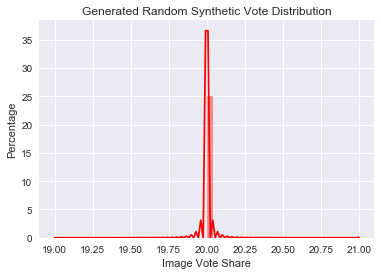

In [121]:
genstatistics = rendomVoteGeneratorIV(5505, 55050, "chapineroSRandomVote4Predict_SchemIV.txt")
sns.set(color_codes=True)
ax = sns.distplot(genstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Generated Random Synthetic Vote Distribution')

plt.show()

<BarContainer object of 5505 artists>

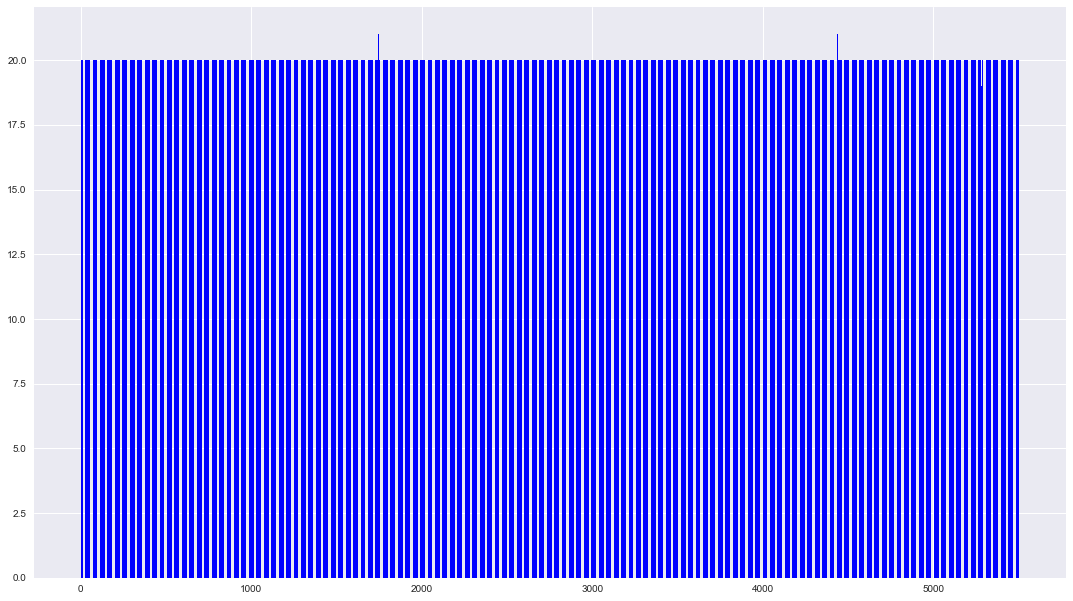

In [122]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(genstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(genstatistics), width, color="blue")

Vote Array Shape
(94780, 3)
voteCheckList Length 189560
Min image vote sharing 19.000000
Max image vote sharing 21.000000
Mean image vote sharing 20.000000
Std image vote sharing 0.035582


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


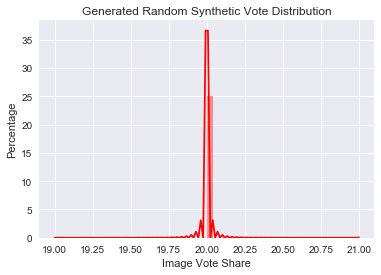

In [123]:
genstatistics = rendomVoteGeneratorIV(9478, 94780, "usaquenSRandomVote4Predict_SchemIV.txt")
sns.set(color_codes=True)
ax = sns.distplot(genstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Generated Random Synthetic Vote Distribution')

plt.show()

<BarContainer object of 9478 artists>

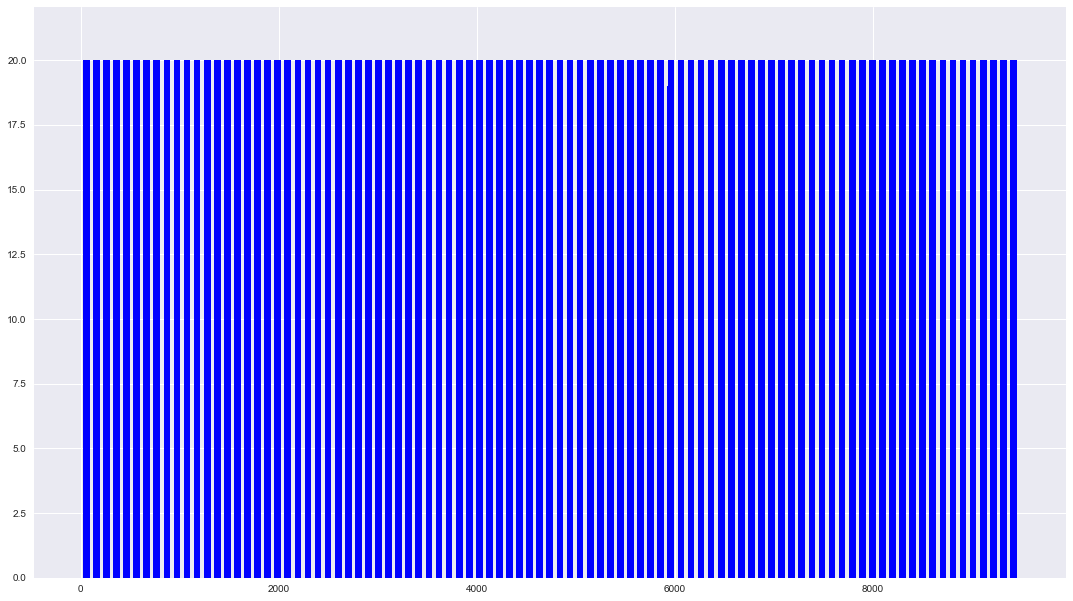

In [124]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(genstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(genstatistics), width, color="blue")

Vote Array Shape
(37880, 3)
voteCheckList Length 75760
Min image vote sharing 19.000000
Max image vote sharing 21.000000
Mean image vote sharing 20.000000
Std image vote sharing 0.056284


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


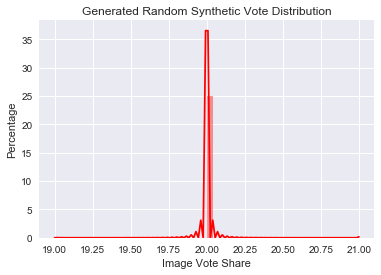

In [125]:
genstatistics = rendomVoteGeneratorIV(3788, 37880, "martirSRandomVote4Predict_SchemIV.txt")
sns.set(color_codes=True)
ax = sns.distplot(genstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Generated Random Synthetic Vote Distribution')

plt.show()

<BarContainer object of 3788 artists>

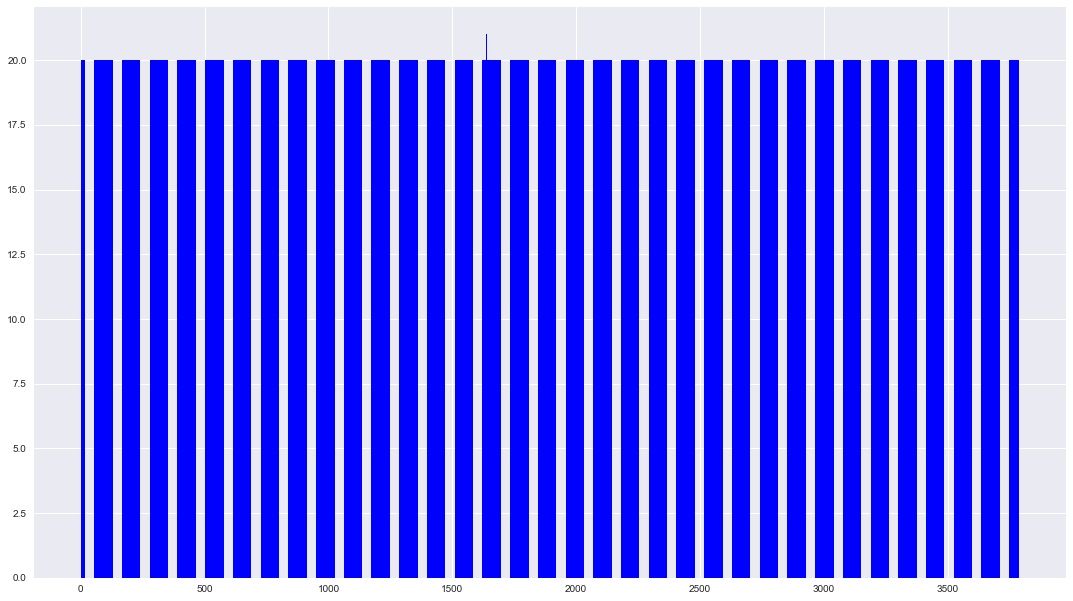

In [126]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(genstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(genstatistics), width, color="blue")

## Actual Vote Set Distribution

In [13]:
actualChapVts = genfromtxt("../descriptorIndexer_Jul_0518.txt", delimiter=',')
print(actualChapVts.shape)
vtstatistics = np.zeros((5505, 1))
for entry in range(0, actualChapVts.shape[0]):
    idxA = int((actualChapVts[entry][0])-1)
    idxB = int((actualChapVts[entry][1])-1)
    vtstatistics[idxA][0] = vtstatistics[idxA][0] + 1
    vtstatistics[idxB][0] = vtstatistics[idxB][0] + 1
    
print("Min image vote sharing %f" % np.min(vtstatistics))
print("Max image vote sharing %f" % np.max(vtstatistics))
print("Mean image vote sharing %f" % np.mean(vtstatistics))
print("Std image vote sharing %f" % np.std(vtstatistics))

(18959, 3)
Min image vote sharing 5.000000
Max image vote sharing 9.000000
Mean image vote sharing 6.887920
Std image vote sharing 0.323987


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


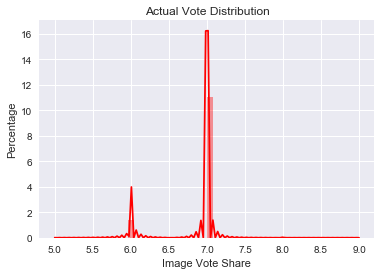

In [29]:
sns.set(color_codes=True)

ax = sns.distplot(vtstatistics,color="#ff0000")
ax.set(xlabel='Image Vote Share',
       ylabel='Percentage',
      title='Actual Vote Distribution')
# ax.set(xlim=(6.8, 7.5))
plt.show()

<BarContainer object of 5505 artists>

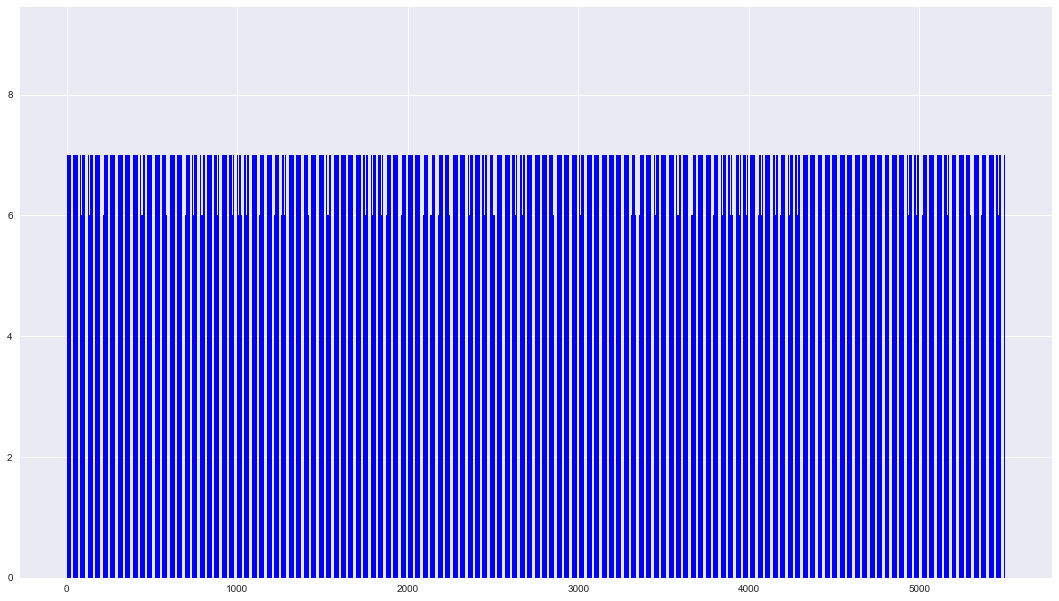

In [15]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
N = len(np.squeeze(vtstatistics))
x = range(N)
width = 1/1.5
plt.bar(x, np.squeeze(vtstatistics), width, color="blue")